## Calculate and Visualize Species Distribution in the US National Parks
Use National Parks species data to create ratios of species categories.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

In [2]:
data = pd.read_csv('species.csv', low_memory=False)

In [3]:
data.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
dtypes: object(13)
memory usage: 11.8+ MB


In [5]:
data['Category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Spider/Scorpion', 'Insect', 'Invertebrate', 'Fungi',
       'Nonvascular Plant', 'Crab/Lobster/Shrimp', 'Slug/Snail', 'Algae'],
      dtype=object)

In [6]:
types = data[['Park Name', 'Category']].copy()

In [7]:
types.head()

,Park Name,Category
0,Acadia National Park,Mammal
1,Acadia National Park,Mammal
2,Acadia National Park,Mammal
3,Acadia National Park,Mammal
4,Acadia National Park,Mammal


In [8]:
types.groupby('Category').first().count()

Park Name    14
dtype: int64

In [9]:
df = types.groupby(['Park Name','Category']).size().unstack(fill_value=0)

In [10]:
df.head()

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Park Name,,,,,,,,,,,,,,
Acadia National Park,0,15,364,0,38,0,0,0,55,0,11,0,0,1226
Arches National Park,0,8,205,0,11,0,0,0,59,0,20,0,0,745
Badlands National Park,0,10,239,0,24,173,239,1,64,0,13,0,1,625
Big Bend National Park,0,13,415,0,53,0,0,0,89,48,62,0,0,1589
Biscayne National Park,0,8,233,0,818,0,11,34,28,0,40,0,0,554


In [11]:
#Sum all of the park rows, divide by sum, and multiply by 100

ratios = df.div(df.sum(axis=1), axis=0).multiply(100)

In [12]:
ratios.head()

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Park Name,,,,,,,,,,,,,,
Acadia National Park,0.0,0.877706,21.299005,0.0,2.223523,0.000000,0.000000,0.000000,3.218256,0.000000,0.643651,0.0,0.000000,71.737858
Arches National Park,0.0,0.763359,19.561069,0.0,1.049618,0.000000,0.000000,0.000000,5.629771,0.000000,1.908397,0.0,0.000000,71.087786
Badlands National Park,0.0,0.719942,17.206623,0.0,1.727862,12.455004,17.206623,0.071994,4.607631,0.000000,0.935925,0.0,0.071994,44.996400
Big Bend National Park,0.0,0.572940,18.289996,0.0,2.335831,0.000000,0.000000,0.000000,3.922433,2.115469,2.732481,0.0,0.000000,70.030851
Biscayne National Park,0.0,0.463499,13.499421,0.0,47.392816,0.000000,0.637312,1.969873,1.622248,0.000000,2.317497,0.0,0.000000,32.097335


In [13]:
rounded = ratios.round(2)

In [14]:
rounded.head()

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Park Name,,,,,,,,,,,,,,
Acadia National Park,0.0,0.88,21.30,0.0,2.22,0.00,0.00,0.00,3.22,0.00,0.64,0.0,0.00,71.74
Arches National Park,0.0,0.76,19.56,0.0,1.05,0.00,0.00,0.00,5.63,0.00,1.91,0.0,0.00,71.09
Badlands National Park,0.0,0.72,17.21,0.0,1.73,12.46,17.21,0.07,4.61,0.00,0.94,0.0,0.07,45.00
Big Bend National Park,0.0,0.57,18.29,0.0,2.34,0.00,0.00,0.00,3.92,2.12,2.73,0.0,0.00,70.03
Biscayne National Park,0.0,0.46,13.50,0.0,47.39,0.00,0.64,1.97,1.62,0.00,2.32,0.0,0.00,32.10


In [15]:
# Optional: export dataframe to CSV
#export_csv = rounded.to_csv ('species_ratios.csv', header=True)

In [16]:
# Get summary of all rounded values
rounded.describe()

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.00000,56.000000
mean,0.539286,0.586429,14.421786,0.351071,3.920893,4.046250,8.048571,1.114464,3.717321,2.826250,1.174643,0.471429,0.46375,58.319821
std,1.377084,0.414555,6.062231,0.778905,8.218496,7.679523,11.782171,1.959364,1.720844,4.835523,1.035018,0.777889,1.22582,14.367554
min,0.000000,0.000000,1.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,0.000000,0.00000,27.240000
25%,0.000000,0.227500,10.812500,0.000000,0.480000,0.000000,0.000000,0.000000,2.402500,0.000000,0.307500,0.000000,0.00000,46.080000
50%,0.000000,0.570000,13.530000,0.000000,1.110000,0.155000,2.220000,0.240000,3.795000,0.190000,0.900000,0.000000,0.00000,60.125000
75%,0.000000,0.837500,18.022500,0.350000,3.670000,3.255000,11.722500,1.447500,4.690000,4.007500,1.940000,0.772500,0.15500,70.280000
max,5.800000,1.850000,33.370000,4.910000,47.390000,35.030000,43.330000,10.400000,7.270000,20.480000,4.040000,3.320000,6.67000,81.700000


In [17]:
means = rounded.mean(axis=0)

In [18]:
means.head()

Category
Algae                   0.539286
Amphibian               0.586429
Bird                   14.421786
Crab/Lobster/Shrimp     0.351071
Fish                    3.920893
dtype: float64

In [19]:
print(means.sum())

100.00196428571427


In [20]:
sorted_vals = means.sort_values(ascending=False)

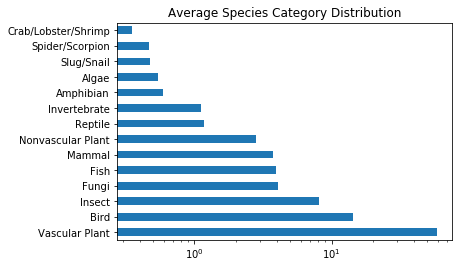

In [21]:
sorted_vals.plot.barh(logx=True)
plt.ylabel('')
plt.title('Average Species Category Distribution')
plt.show()

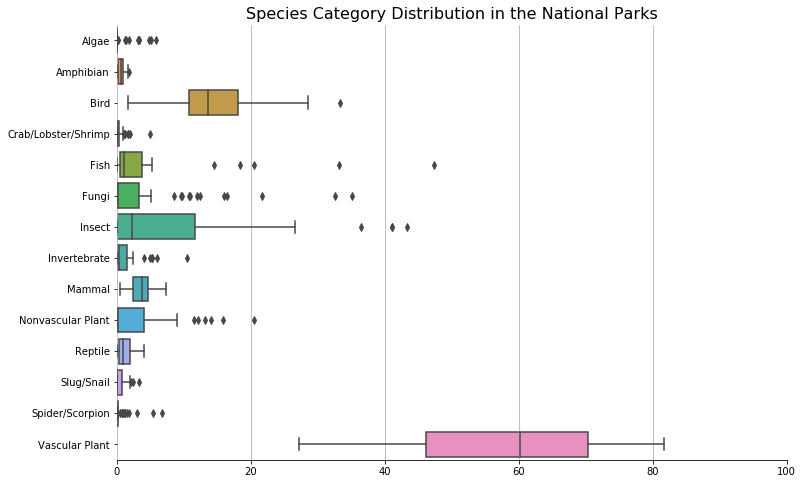

In [23]:
f, ax = plt.subplots(figsize=(12, 8))

sb.boxplot(data=rounded, orient='h')
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlim=(0,100))
sb.despine(trim=True, left=True)
plt.title('Species Category Distribution in the National Parks', fontsize=16)
#plt.savefig('category_dist_parks.png', bbox_inches='tight')
plt.show()